c:/Users/chris/OneDrive/AI/Validation/correlation_with_manual/230727_ho1_raw.csv
[]
Pearson correlation coefficient: 0.93575253395675


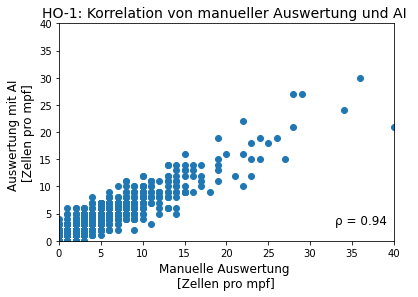

,cell_count,cell_count_AI
count,1034.000000,1034.000000
mean,4.243714,3.589942
std,5.526368,4.285564
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,6.000000,5.000000
max,55.000000,46.000000


In [1]:
##correlation of AI and manual validated counts on small images

import pandas as pd
import numpy as np
import os

#definition of marker
marker = 'HO-1'

path_AI = 'c:/Users/chris/OneDrive/AI/Validation/correlation_with_manual/'

if marker == 'HO-1':
    list_image= os.listdir('d:/D_lw/APromotion/Bilder/ho1 main/img_raw/')
    list_cells= os.listdir('d:/D_lw/APromotion/Bilder/ho1 main/img_pos_all/')
    file = '230727_ho1_raw.csv'
    deli = ';'

elif marker == 'IBA1':
    list_image= os.listdir('d:/D_lw/APromotion/Bilder/iba1 main/raw_update/')
    list_cells= os.listdir('d:/D_lw/APromotion/Bilder/iba1 main/img_pos_musk/')
    file = '230727_AIClassify_iba1_raw_incomplete.csv'
    deli = ', '

elif marker == 'CD206':
    list_image= os.listdir('d:/D_lw/APromotion/Bilder/cd206 main/raw_clean without 40-7 pgl muko/')
    list_cells= os.listdir('d:/D_lw/APromotion/Bilder/cd206 main/img_pos_musk/')
    file ="230525_AIClassify_cd206_raw.csv"
    deli = ','

file_path =path_AI + file
print(file_path)
print(list_cells)

list2=[]


        
list_image = [x[:29].lower() for x in list_image]
list_cells = [x[:29].lower() for x in list_cells]

df = pd.DataFrame(list_image ,columns= ['image'])

df['short_image'] = df['image'].str[:8]


df['portion'] = df['short_image'].str[5:7]
df['animal'] = df['short_image'].str[:2]
df['slide'] = df['short_image'].str[3]
df['layer'] = df['image'].apply(lambda x: 'musk' if 'musk' in x else 'muco')
df['genotype'] = df['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')
df['cell_count'] = df['image'].apply(lambda x: list_cells.count(x))


df_musk = df.loc[df['layer']=='musk', ['image','short_image','genotype','animal', 'portion', 'cell_count']]


import matplotlib.pyplot as plt

##correlation of ML and manual


# Read the CSV file into a pandas DataFrame
df_AI = pd.read_csv(file_path, delimiter = deli)
df_AI.columns = ['image_long', 'cell_count_AI']
df_AI['image'] = df_AI['image_long'].apply(lambda x: x[:29].lower())

df_correl_AI = df_musk.merge(df_AI, on = 'image')

#calculate Correlation of AI and manual count
correlation_coefficient = df_correl_AI['cell_count'].corr(df_correl_AI['cell_count_AI'])

print("Pearson correlation coefficient:", correlation_coefficient)

plt.scatter(df_correl_AI['cell_count'], df_correl_AI['cell_count_AI'])
plt.xlim(0, 40)
plt.ylim(0,40)
plt.xlabel('Manuelle Auswertung \n[Zellen pro mpf]', fontsize = 12)
plt.ylabel('Auswertung mit AI \n[Zellen pro mpf]', fontsize = 12)
plt.title(marker+': Korrelation von manueller Auswertung und AI ' , fontsize = 14)

plt.text(33, 3, 'ρ = {:.2f}'.format(correlation_coefficient), fontsize=12)
plt.show()


df_correl_AI.describe()


In [2]:
#correlation with final results of AI on Whole Slide Images and the manual counts


import csv

data = []

if marker == 'IBA1':
    file2 = '230414_fullslideiba1_scan_211109_resnet_corr.csv'
    stain = 'iba1'
elif marker == 'CD206':
    stain='cd206'
    file2 = '20230727_fullslidecd206_scan_211109_resnet18_cropped.csv'
elif marker == 'HO-1':
    stain = 'ho1'
    file2 = '230414_fullslideho1_scan_211109_resnet18_reverse.csv'
path2 = 'c:/Users/chris/OneDrive/AI/Validation/fullslide_scans/'


file_path =path2 +file2
print(file_path)

df_AI_fullslide = pd.read_csv(file_path, delimiter = ',' , usecols=[0,1,2])
df_AI_fullslide.describe()


df_AI_fullslide.columns =['slide', 'count', 'area']
pd.to_numeric(df_AI_fullslide['count'])
pd.to_numeric(df_AI_fullslide['area'])
df_AI_fullslide['count per area'] = df_AI_fullslide['area']/df_AI_fullslide['count']
df_AI_fullslide['ID'] = df_AI_fullslide['slide'].str[:-5]
df_AI_fullslide

c:/Users/chris/OneDrive/AI/Validation/fullslide_scans/230414_fullslideho1_scan_211109_resnet18_reverse.csv


,slide,count,area,count per area,ID
0,3605ppvho1.mrxs,24.367121,177,7.263886,3605ppvho1
1,3606pglho1.mrxs,154.336583,68,0.440595,3606pglho1
2,3606ppvho1.mrxs,25.765203,395,15.330754,3606ppvho1
3,3607pglho1.mrxs,15.241063,212,13.909791,3607pglho1
4,3607pylho1.mrxs,15.293558,67,4.380929,3607pylho1
5,3701pylho1.mrxs,39.034971,77,1.972590,3701pylho1
6,3702pglho1.mrxs,12.029375,121,10.058711,3702pglho1
7,3702ppvho1.mrxs,11.668613,415,35.565495,3702ppvho1
8,3703ppvho1.mrxs,10.738253,143,13.316877,3703ppvho1
9,3704pylho1.mrxs,292.361002,96,0.328361,3704pylho1


       slide  mean_cell_slide  std_cell_slide animal genotype portion_short  \
0   36-4 py          5.772727        3.766163     36       WT            py   
1   36-5 ppv         6.333333        5.816643     36       WT            pp   
2   36-6 pgl         4.187500        4.888336     36       WT            pg   
3   36-6 ppv         6.347826        4.867412     36       WT            pp   
4   36-7 pgl         7.533333       10.301641     36       WT            pg   
5   36-7 py          3.809524        4.749937     36       WT            py   
6   37-1 py          1.156250        2.156900     37       TG            py   
7   37-2 pgl         3.733333        5.324695     37       TG            pg   
8   37-2 ppv         9.285714       11.424862     37       TG            pp   
9   37-3 ppv        13.923077        8.479992     37       TG            pp   
10  37-4 py          4.529412        7.378245     37       TG            py   
11  37-8 pgl         7.050000       12.991799     37

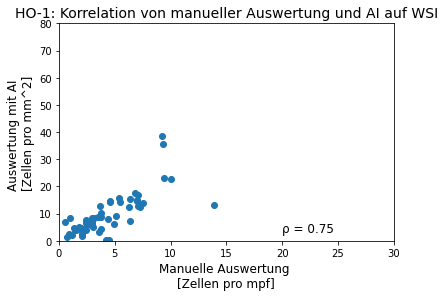

In [4]:
#correlation of cellcount by manual and cellcount by AI on the full slide

portion_short = ['pp', 'pg', 'py']
portion =['ppv', 'pgl', 'pyl']

##collect all data in one dataframe
df_slide = df_musk.groupby(['short_image']).agg({'cell_count': ['mean', 'std']}).reset_index()
df_slide['animal'] = df_slide['short_image'].str[:2]
df_slide['genotype'] = df_slide['animal'].apply(lambda x: 'WT' if int(x) in [36,38,41,43,45] else 'TG')
df_slide['portion_short'] = df_slide['short_image'].str[5:7]
df_slide['portion'] = df_slide['portion_short'].apply(lambda x: portion[portion_short.index(x)])
df_slide.columns = ['slide', 'mean_cell_slide', 'std_cell_slide', 'animal','genotype','portion_short', 'portion']


df_slide['portion_3'] = df_slide['portion'].apply(lambda x: 'v' if 'pp' in x else 'l')

df_slide['ID'] = df_slide['slide'].str[:2]+'0'+ df_slide['slide'].str[3]+ df_slide['portion'] +stain
print(df_slide)

df_slide_compare = df_slide.merge(df_AI_fullslide, on = 'ID')

df_slide_compare = df_slide_compare.drop(columns =['slide_x', 'animal', 'genotype', 'portion', 'slide_y', 'portion_3'])



correlation_coefficient = df_slide_compare['mean_cell_slide'].corr(df_slide_compare['count per area'])
## calculate pearson rho
print("Pearson correlation coefficient:", correlation_coefficient)

##plot scatter plot with the correlation
plt.scatter(df_slide_compare['mean_cell_slide'] ,df_slide_compare['count per area'])
plt.xlim(0, 30,2)
plt.ylim(0,80)
plt.xlabel('Manuelle Auswertung \n[Zellen pro mpf]', fontsize = 12)
plt.ylabel('Auswertung mit AI \n[Zellen pro mm^2]', fontsize = 12)
plt.title(marker+': Korrelation von manueller Auswertung und AI auf WSI', fontsize = 14)

plt.text(20, 3, 'ρ = {:.2f}'.format(correlation_coefficient), fontsize=12)
plt.show()
